# library # 

In [1]:
library(cowplot)
library(patchwork)
library(ggpubr)
library(ggplot2)
library(grid)
library(gridExtra)
library(dplyr)
library(tidyverse)
library(RColorBrewer)
library(ggalluvial)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()   masks gridExtra::combine()
✖ dplyr::filter()    mask

# Fig A

In [2]:
# 
DensityPlot <- function(data,title,color_str=c('GF'="#0000ff",'SPF'="#ff0000"),
                        xlim=c(-5,2),x_breaks = 1,
                        ylim=c(0,0.7),y_breaks = 0.2,labels){
    data$group <- factor(data$group,levels = c("GF","SPF"))
    p <-ggplot(data, aes(log10(value+0.00001), fill = group,alpha=0.8)) +
        geom_density() +
      labs(title = title, x = "",y = "") + theme_classic() + 
      theme(plot.title = element_text(size = 25,hjust = 0.5,face = "bold"))+
      theme(axis.text = element_text(size = 20),axis.title = element_text(size = 20),
      legend.text = element_text(size = 20 ),
      legend.title = element_text(size = 20 ,face = "bold")) + 
      scale_x_continuous(limits = xlim, breaks = seq(xlim[1],xlim[2],x_breaks),labels = labels,expand = c(0,0))+
      scale_y_continuous(limits = ylim,breaks = seq(ylim[1],ylim[2],y_breaks),expand = c(0,0))+
      scale_fill_manual(values=color_str,labels=c('GF','SPF'))+
      guides(alpha="none") + guides(fill = guide_legend( ncol = 1, byrow = TRUE))
    return(p)
}
MultiDenistyPlot <- function(dat_list,color_str=c('GF'="#0000ff",'SPF'="#ff0000"),
                        xlim=c(-5,2),x_breaks = 1,
                        ylim=c(0,0.7),y_breaks = 0.2,labels){
    plist <- list()
    for(i in names(dat_list)){
        plist[[i]] <- DensityPlot(data = dat_lst[[i]],title = i,color_str = color_str,
                                  xlim = xlim,ylim=ylim,x_breaks = x_breaks,
                                  y_breaks = y_breaks,labels = labels)
    }
    return(plist)
}
# Scientific counting
fancy_scientific <- function(l) {
  # turn in to character string in scientific notation
  l <- format(l, scientific = TRUE)
  l <- gsub("0e\\+00","0",l)
  # quote the part before the exponent to keep all the digits
  l <- gsub("^(.*)e", "'\\1'e", l)
  # remove "+" after exponent, if exists. E.g.: (3x10^+2 -> 3x10^2) 
  l <- gsub("e\\+","e",l)
  # turn the 'e+' into plotmath format
  l <- gsub("e", "%*%10^", l)
  # convert 1x10^ or 1.000x10^ -> 10^ 
  l <- gsub("\\'1[\\.0]*\\'\\%\\*\\%", "", l)
  # return this as an expression
  parse(text=l)
}
tran_scientific <- function(x){
    s <- c()
    for(i in x){
      #print(i)
      f <- fancy_scientific(i)
      s <- c(s,f)
    }
    return(s)
}
date()

[1] "Sat Jan  6 16:27:05 2024"

In [3]:
dat_lst <- readRDS("Bile45_Acid1t1.rds")
date()

[1] "Sat Jan  6 16:27:06 2024"

In [4]:
str(dat_lst)

List of 4
 $ cecum :'data.frame':	432 obs. of  3 variables:
  ..$ variable: Factor w/ 12 levels "SPF_1_2_cecum",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value   : num [1:432] 1.538 0.0005 0.0014 0.0559 0.0048 ...
  ..$ group   : Factor w/ 2 levels "GF","SPF": 2 2 2 2 2 2 2 2 2 2 ...
 $ feces :'data.frame':	432 obs. of  3 variables:
  ..$ variable: Factor w/ 12 levels "SPF_1_1_feces",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value   : num [1:432] 0.0067 0.0005 0.0008 0.069 0.0065 ...
  ..$ group   : Factor w/ 2 levels "GF","SPF": 2 2 2 2 2 2 2 2 2 2 ...
 $ liver :'data.frame':	432 obs. of  3 variables:
  ..$ variable: Factor w/ 12 levels "SPF10_A_2","SPF10_B_2",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value   : num [1:432] 0.0011 0.0012 0.0002 0.0001 0.0006 ...
  ..$ group   : Factor w/ 2 levels "GF","SPF": 2 2 2 2 2 2 2 2 2 2 ...
 $ plasma:'data.frame':	176 obs. of  3 variables:
  ..$ variable: Factor w/ 11 levels "SPF_A_1","SPF_B_1",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value   : num [1:176] 2.495 0.127 1.122 

In [5]:
x <- c(10^-5,NA,10^-3,NA,10^-1,NA,10^1,NA)
s <- tran_scientific(x = x)
s

expression(10^-5, NA, 10^-3, NA, 10^-1, NA, 10^1, NA)

In [6]:
h1  <- MultiDenistyPlot(dat_list = dat_lst[c(3,1,2)], color_str=c('GF'="#ddc1a3",'SPF'="#afb0ce"),
                        labels = s)
date()

[1] "Sat Jan  6 16:27:11 2024"

In [10]:
x <- c(NA,10^-1,NA,10^1,NA,10^3)
t <- tran_scientific(x = x)
t

expression(NA, 10^-1, NA, 10^1, NA, 10^3)

In [11]:
h2  <- MultiDenistyPlot(dat_list = dat_lst[4], xlim=c(-2,3),color_str=c('GF'="#ddc1a3",'SPF'="#afb0ce"),
                        labels = t)
date()

[1] "Sat Jan  6 16:27:28 2024"

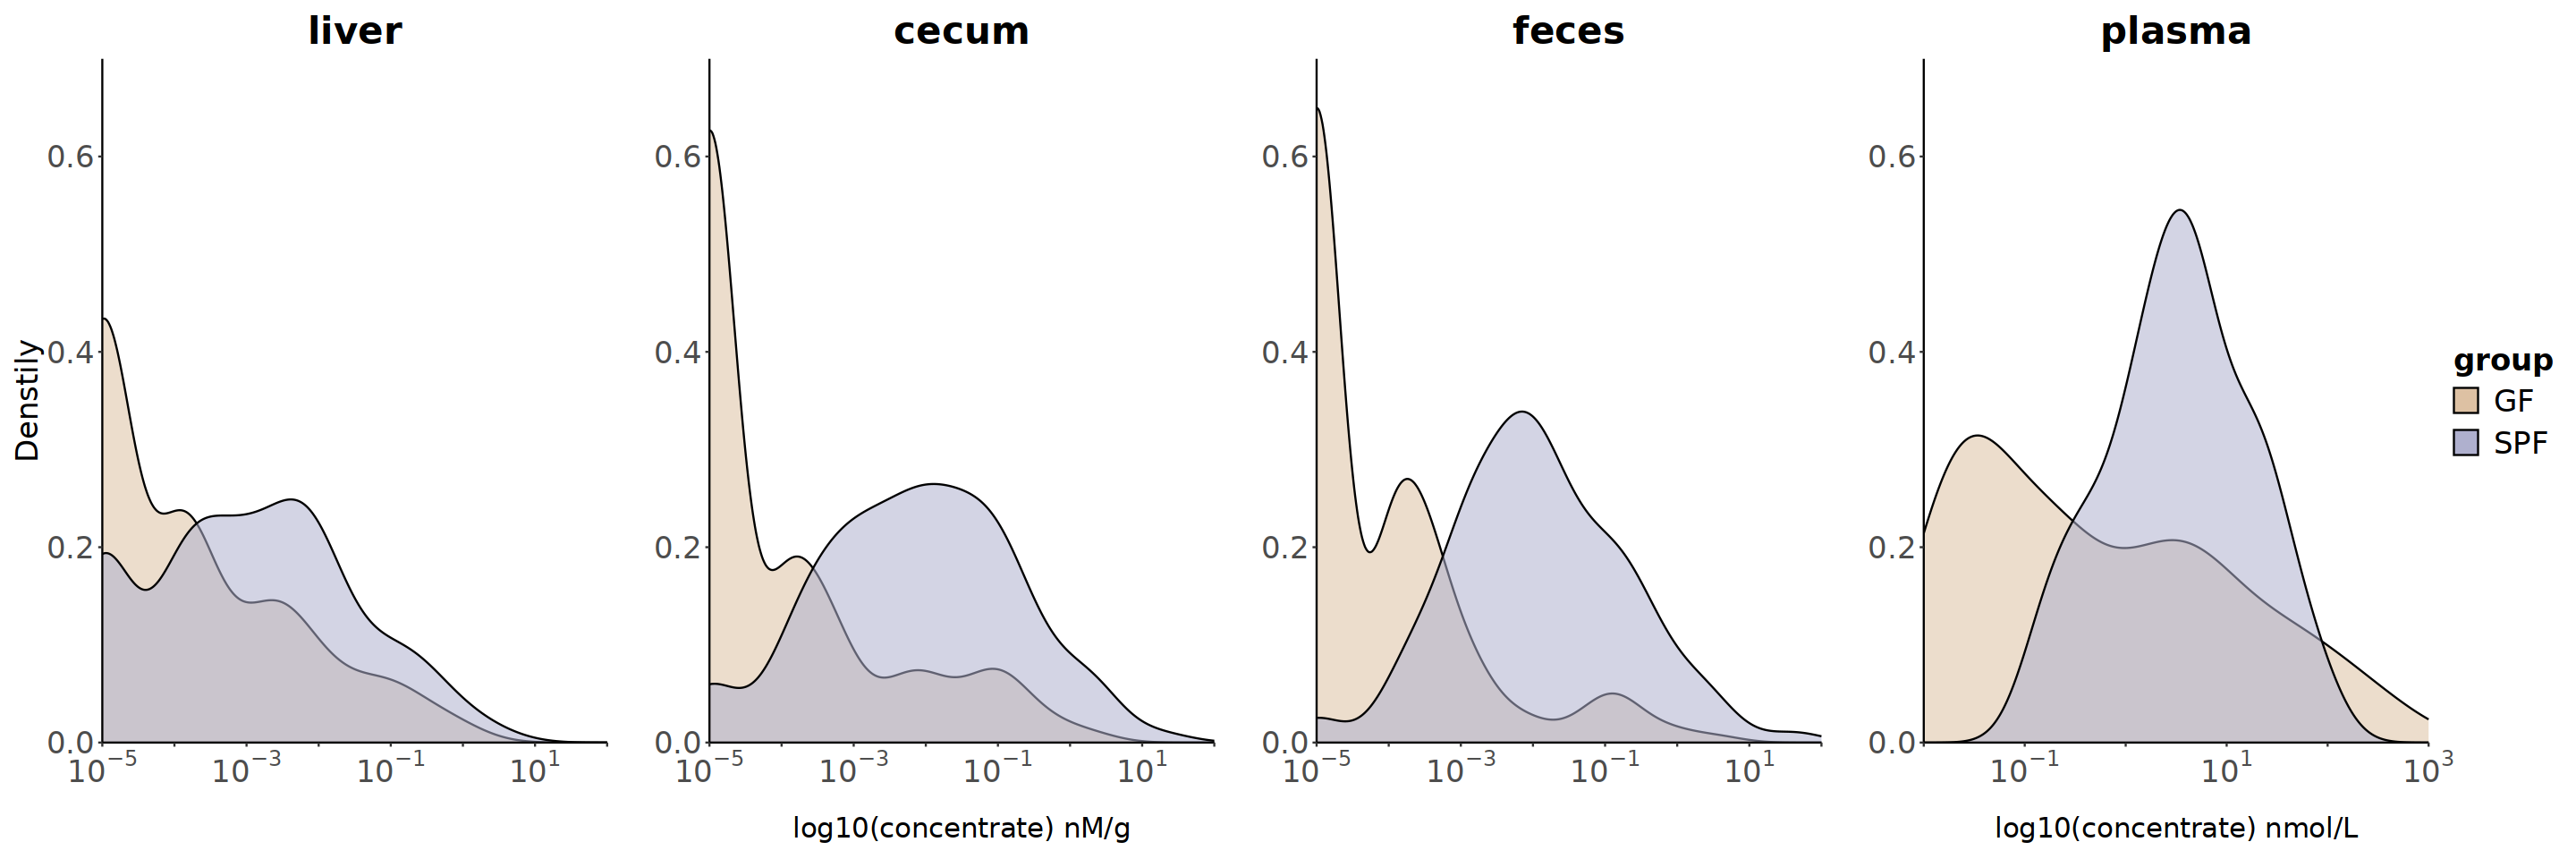

In [13]:
h1$cecum <- h1$cecum + labs(caption="log10(concentrate) nM/g") +
  theme(plot.caption=element_text(size=18, hjust=0.5, margin=margin(0,0,0,0)))
h1$liver <-  h1$liver + theme(legend.position = "none") + labs(y = "Denstily")
h1$plasma <- h2$plasma + labs(caption="log10(concentrate) nmol/L") +
  theme(plot.caption=element_text(size=18, hjust=0.5, margin=margin(0,0,0,0)))
options(repr.plot.width = 24,repr.plot.height = 8)
p <- wrap_plots(h1,ncol=4,guides = "collect")
p

# Fig C # 

In [10]:
data <- readRDS("Figure4C_OH_nonOH.rds")
date()

[1] "Fri Jan  5 09:54:09 2024"

In [104]:
str(data)

List of 2
 $ liver :'data.frame':	12 obs. of  5 variables:
  ..$ Group             : Factor w/ 2 levels "SPF","GF": 2 2 1 1 2 2 1 1 2 2 ...
  ..$ variable          : Factor w/ 2 levels "mean_non_OH",..: 1 2 1 2 1 2 1 2 1 2 ...
  ..$ Total_C           : num [1:12] 0.696 0.192 1.131 1.251 0.906 ...
  ..$ Relative_Abundance: num [1:12] 0.784 0.216 0.475 0.525 0.779 ...
  ..$ Type              : Factor w/ 3 levels "liver","cecum",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ plasma:'data.frame':	4 obs. of  5 variables:
  ..$ Group             : Factor w/ 2 levels "SPF","GF": 2 2 1 1
  ..$ variable          : Factor w/ 2 levels "mean_non_OH",..: 1 2 1 2
  ..$ Total_C           : num [1:4] 315.7 37.2 105 61.3
  ..$ Relative_Abundance: num [1:4] 0.895 0.105 0.631 0.369
  ..$ Type              : chr [1:4] "plasma" "plasma" "plasma" "plasma"


In [105]:
data[["liver"]]

Group,variable,Total_C,Relative_Abundance,Type
<fct>,<fct>,<dbl>,<dbl>,<fct>
GF,mean_non_OH,0.6964667,0.78352990,liver
GF,mean_OH,0.1924167,0.21647010,liver
SPF,mean_non_OH,1.1312667,0.47490310,liver
SPF,mean_OH,1.2508333,0.52509690,liver
GF,mean_non_OH,0.9064167,0.77880884,cecum
GF,mean_OH,0.2574333,0.22119116,cecum
SPF,mean_non_OH,9.9795500,0.83460244,cecum
SPF,mean_OH,1.9777000,0.16539756,cecum
GF,mean_non_OH,1.0557000,0.84309863,feces


In [3]:
group_liver_cecum_feces_mean1_RA1 <- data[["liver"]]
group_plasma1t_OH_sum1t1_mean1_RA1 <- data[["plasma"]]
date()

[1] "Fri Jan  5 09:39:12 2024"

In [11]:
dat <- do.call(rbind,data)

In [12]:
dat

,Group,variable,Total_C,Relative_Abundance,Type
,<fct>,<fct>,<dbl>,<dbl>,<fct>
liver.1,GF,mean_non_OH,0.6964667,0.78352990,liver
liver.2,GF,mean_OH,0.1924167,0.21647010,liver
liver.3,SPF,mean_non_OH,1.1312667,0.47490310,liver
liver.4,SPF,mean_OH,1.2508333,0.52509690,liver
liver.5,GF,mean_non_OH,0.9064167,0.77880884,cecum
liver.6,GF,mean_OH,0.2574333,0.22119116,cecum
liver.7,SPF,mean_non_OH,9.9795500,0.83460244,cecum
liver.8,SPF,mean_OH,1.9777000,0.16539756,cecum
liver.9,GF,mean_non_OH,1.0557000,0.84309863,feces


In [13]:
mulitBarplot <- function(dat,color=c("#955117","#F3E295")){
    dat$Group<-factor(dat$Group,levels=c("SPF","GF"))
    dat$variable<-factor(dat$variable,levels=c("mean_non_OH","mean_OH"))
    theme_self <- theme(plot.title = element_text(size = 25,hjust = 0.5,face = "bold"),
                        axis.text = element_text(size = 16),
                        #axis.title = element_text(size = 23),
                        legend.text = element_text(size = 16),
                        legend.title = element_text(size = 18 ,face = "bold"),
                        axis.title.y = element_text(size=18,margin = margin(0,10,0,0))) + 
                  theme(strip.background = element_blank(),strip.text =  element_text(size = 23,angle = 0))
    p <-ggplot(dat,aes(x=Group,y=Relative_Abundance,fill=variable))+ facet_wrap(~Type,ncol = 4) +
                  geom_bar(stat="identity",width = 0.7)+theme_classic()+
                  scale_fill_manual(values=color,labels = c("non 12-OH","12-OH"))+
                  labs(title = "", x = "", y = "Realtive Abundance")  + theme_self  +
                    guides(fill = guide_legend(title = "BA type",ncol = 1, byrow = TRUE))
    return(p)
}

[1] "Fri Jan  5 09:54:21 2024"

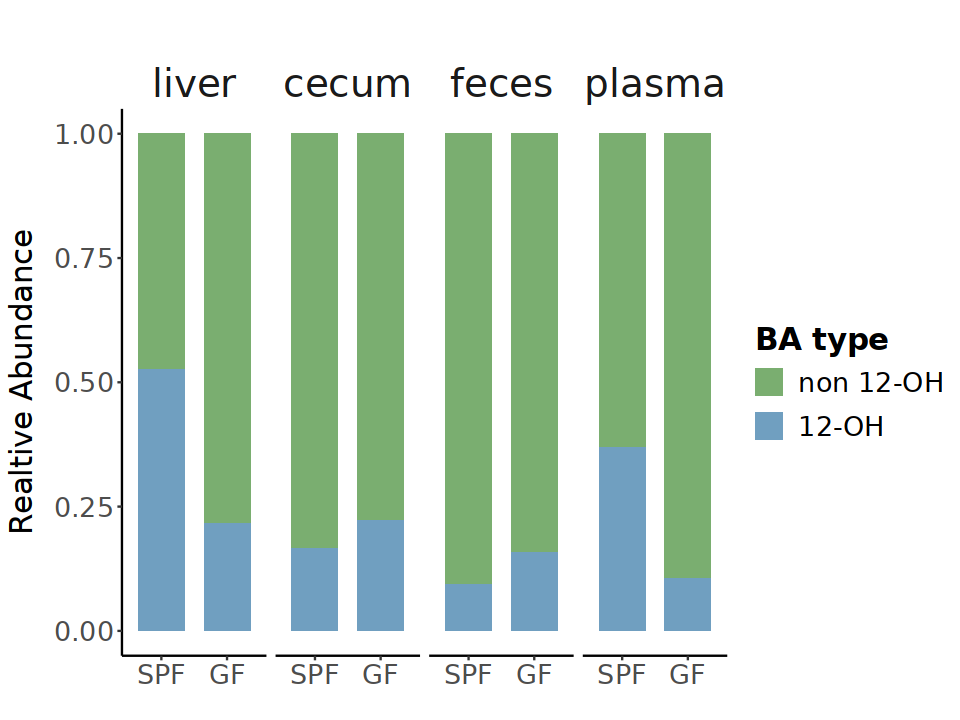

In [15]:
options(repr.plot.width = 8,repr.plot.height = 6)
p <- mulitBarplot(dat = dat,color = c("#7aae70","#709fc0"))
p
date()

# fig D # 

In [ ]:
data <- readRDS("liver_45Bile.rds")
date()

[1] "Fri Jan  5 09:55:37 2024"

In [20]:
DoBoxplot <- function(data,x = "Group.x",y = "CDCA_CA" , color = c("#FF0000","#0000FF"),title){
    data$Group.x<-factor(data$Group.x, levels=c("GF","SPF"))
    theme_self <- theme(plot.title = element_text(size = 23,hjust = 0.5,face = "bold"),
                        axis.text = element_text(size = 15,colour="#000000"),
                        axis.title = element_text(size = 18,colour="#000000"),
                        legend.text = element_text(size = 15),
                      legend.title = element_text(size = 18 ,face = "bold"))
    p <- ggplot(data=data,aes_string(x = x,y = y))+
              geom_boxplot(aes(fill=Group.x),outlier.colour=NA,width=0.4,position="dodge",alpha=1)+
              scale_fill_manual(values=color,labels=c('GF','SPF'))+
              scale_x_discrete(limits = c("SPF","GF")) + 
              theme_classic()+labs(x="",y="",title =title)+
              geom_jitter(position=position_jitter(0.08))+
              geom_signif(comparisons=list(c('SPF',"GF")),
              test=wilcox.test,step_increase=0.1,textsize=5,
              map_signif_level=T, colour="#000000") + theme_self + guides(fill = guide_legend(title = "Group"))
    return(p)

}
date()

[1] "Fri Jan  5 09:55:56 2024"

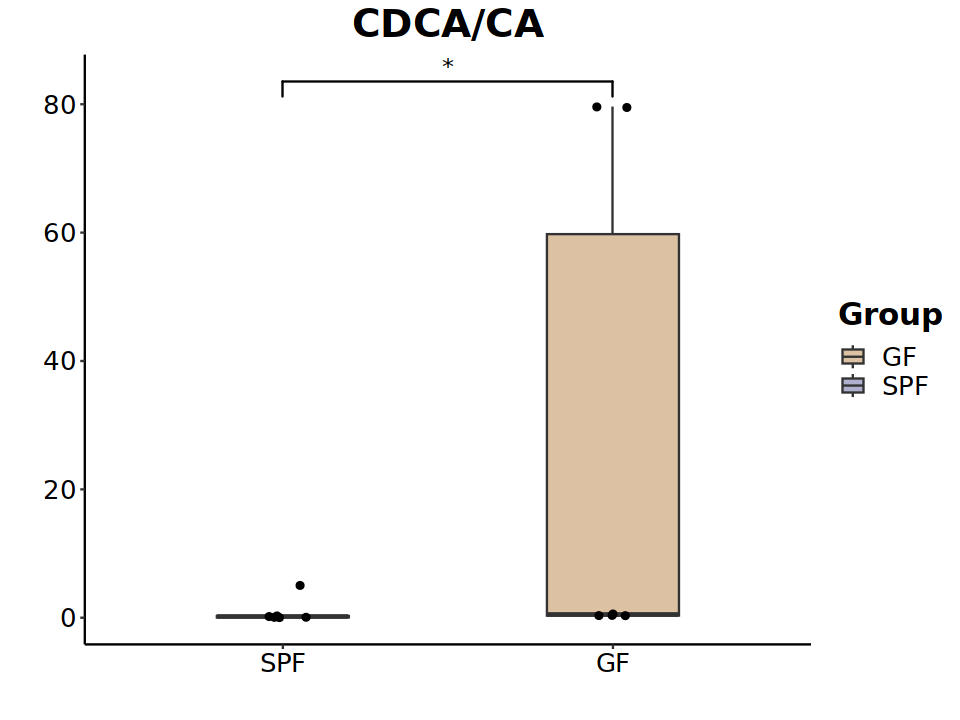

In [24]:
liver_CDCA_CA <- data[["liver_CDCA_CA"]]
p1 <- DoBoxplot(data = liver_CDCA_CA,y = "CDCA_CA",title = "CDCA/CA",
               color = c("#ddc1a3","#afb0ce"))
p1

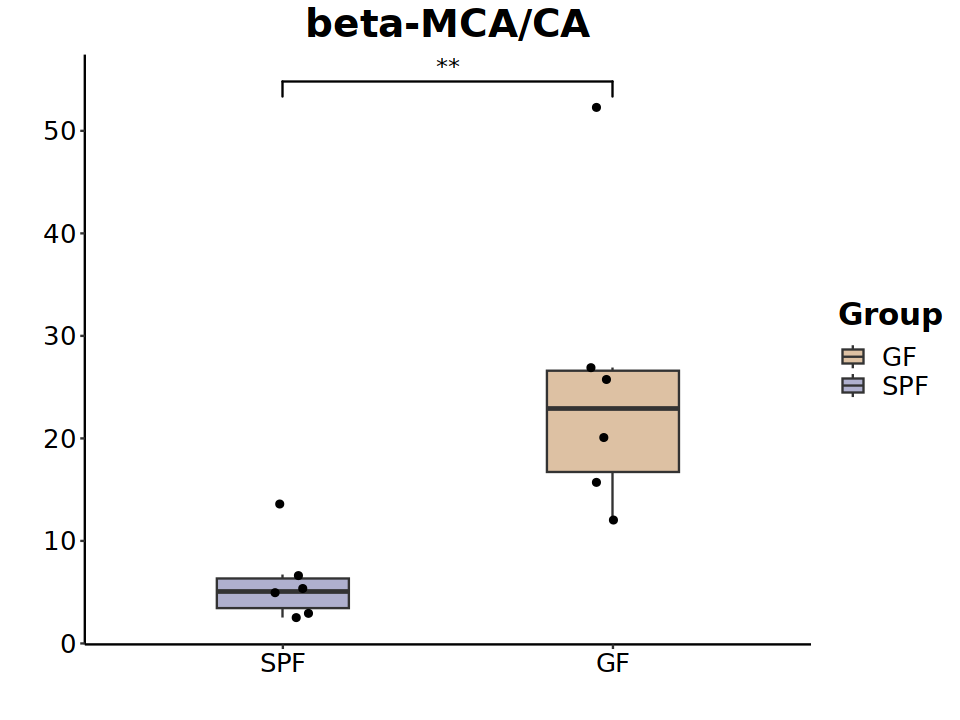

In [25]:
liver_beta_MCA_CA <- data[["liver_beta_MCA_CA"]]
p2 <- DoBoxplot(data = liver_beta_MCA_CA,y = "beta_MCA_CA",title = "beta-MCA/CA",
               color = c("#ddc1a3","#afb0ce"))
p2

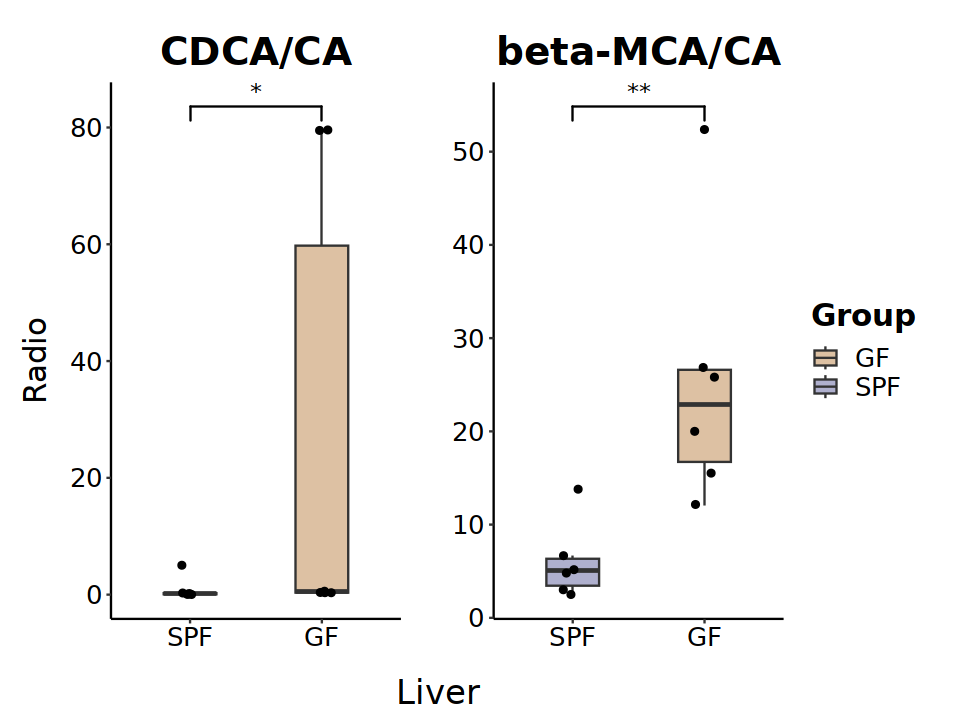

In [26]:
options(repr.plot.width = 8,repr.plot.height = 6)
plist <- list(p1 = p1,p2 = p2)
p <- wrap_plots(plist,ncol=2,guides = "collect") 
p <- wrap_elements(panel = p)  + labs(tag = "Radio") +theme(plot.tag = element_text(size = 18,angle = 90,
                                                                                    margin = margin(0,-20,0,0)),
                                                            plot.tag.position = "left") +
               plot_annotation(caption = "Liver",theme = theme(plot.caption = element_text(size = 20,hjust = 0.45,
                                                                      margin = margin(-20,0,0,0)))) 
p 

 # Fig B 

In [34]:
dat_lst <- readRDS("/data/work/FinallyPlot/MainPlot/Fig/20231220/Figure4B_composition.rds")
date()

[1] "Sat Jan  6 16:47:23 2024"

In [37]:
str(dat_lst)

List of 4
 $ liver :'data.frame':	72 obs. of  4 variables:
  ..$ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
  ..$ variable    : Factor w/ 2 levels "SPF_liver","GF_liver": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value       : num [1:72] 3.08e-02 1.17e-05 1.37e-04 1.50e-04 2.27e-04 ...
  ..$ Group       : Factor w/ 2 levels "SPF","GF": 1 1 1 1 1 1 1 1 1 1 ...
 $ cecum :'data.frame':	72 obs. of  4 variables:
  ..$ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
  ..$ variable    : Factor w/ 2 levels "SPF_cecum","GF_cecum": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value       : num [1:72] 0.010752 0.007082 0.000238 0.007203 0.004381 ...
  ..$ Group       : Factor w/ 2 levels "SPF","GF": 1 1 1 1 1 1 1 1 1 1 ...
 $ feces :'data.frame':	72 obs. of  4 variables:
  ..$ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
  ..$ variable    : Factor w/ 2 levels "SPF_feces","GF_feces": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ value

In [18]:
sort_abb <- c("CA","beta_CA","NorCA","APCA","CDCA","a_MCA","beta_MCA","w_MCA","HCA","UCA","UDCA","beta_UDCA",
              "TCA","TCDCA","T_a_MCA","T_beta_MCA","T_w_MCA","GHCA","GUDCA","TUDCA","MDCA","NorDCA",
              "DCA","beta_DCA","three_oxoCA","LCA","Dio_LCA","Iso_ACA","HDCA","beta_HDCA","TDCA","TLCA",
              "THDOCA","seven_KetoLCA","seven_KetoDCA","twelve_ketoLCA")

In [19]:
CaluLinkList <- function(lst,sort_Abbreviation){
    dat_lst <- list()
    for(i in names(lst)){
        print(i)
        data <- lst[[i]]
        dat_lst[[i]]$counts <- data
        colnames(data)[2] <- "Group_type"
        dat <- data %>% select(Group_type,Abbreviation, value)
        dat <- spread(dat,key = Group_type,value = value)
        dat$Tissue <- i
        dat$Abbreviation <- as.character(dat$Abbreviation)
        print(head(dat,2))
        dat_lst[[i]]$link <- dat  %>% mutate(Abbreviation = fct_relevel(Abbreviation,sort_Abbreviation)) %>%
                    arrange(by=desc(Abbreviation)) %>%
                        mutate(GroupA=cumsum(.data[[colnames(dat)[2]]]), 
                               GroupB=cumsum(.data[[colnames(dat)[3]]]))
        print('--end--')
    }
    return(dat_lst)
}
date()

[1] "Sat Jan  6 16:44:31 2024"

In [20]:
datB <- CaluLinkList(lst = dat_lst,sort_Abbreviation = sort_abb)

[1] "liver"
  Abbreviation    SPF_liver    GF_liver Tissue
1           CA 0.0420140655 1.39817e-02  liver
2      beta_CA 0.0001369451 6.53672e-05  liver
[1] "--end--"
[1] "cecum"
  Abbreviation    SPF_cecum    GF_cecum Tissue
1           CA 0.0091594543 0.001024221  cecum
2      beta_CA 0.0002380067 0.000000000  cecum
[1] "--end--"
[1] "feces"
  Abbreviation   SPF_feces    GF_feces Tissue
1           CA 0.015764628 0.007833726  feces
2      beta_CA 0.000280144 0.000000000  feces
[1] "--end--"
[1] "plasma"
  Abbreviation SPF_plasma    GF_plasma Tissue
1           CA 0.01029760 0.0005947678 plasma
2      beta_CA 0.03318932 0.0001000753 plasma
[1] "--end--"


In [46]:
WrapPlot <- function(lst,mycolor,ncol,ax.tx.size = 20,
                     lg.tx.size = 16,
                     lg.tl.size = 25){
    # theme self # 
    mytheme <- theme_classic() + theme(
        axis.text.y = element_text(size = ax.tx.size,face = "bold",margin = margin(0,5,0,0)),
        axis.text.x = element_text(size = ax.tx.size,face = "bold",margin = margin(5,0,0,0)),
        axis.line = element_line(linetype = 1,color= "black",size = 1),
        axis.ticks = element_line(linetype = 1,color= "black",size = 1,lineend = 100),
        legend.text = element_text(size = lg.tx.size,face = "bold"),
        legend.title = element_text(size = lg.tl.size,face = "bold")) + 
               theme(legend.key.size = unit(1,"cm"), 
                  legend.spacing.x = unit(0.2,'cm'),
                  legend.spacing.y = unit(0.2,'cm'),
                  legend.text = element_text(margin = margin(t = 0,r = 0,b = 0,l =  0))) + 
               theme(plot.title = element_text(size = 25,hjust = 0.5,face = "bold"),plot.margin = margin(0,0,0,0))
    plst <- lst()
    for(i in names(lst)){
        counts <- lst[[i]]$counts
        print(head(counts,2))
        links <- lst[[i]]$link
        print(head(links,2))
        counts$Abbreviation <- factor(counts$Abbreviation,levels = levels(links$Abbreviation))
        str(counts)
        plst[[i]] <-  ggplot(counts, aes(x=Group, y=value, fill=Abbreviation)) +
                geom_bar(stat = "identity", width=0.5, col='black',alpha = 0.5)  +
                geom_segment(data=links, aes(x=1.25, xend=1.75, y=GroupA, yend=GroupB)) +
                scale_fill_manual(values=mycolor) + xlab('') +
                ylab(" ") + labs(title = i) + 
        guides(fill = guide_legend(ncol = 2, byrow = TRUE,override.aes = list(size = 10)))+ mytheme  
    }
    p <- wrap_plots(plst,ncol= ncol,guides = "collect")
    return(p)
}
date()

[1] "Sat Jan  6 16:53:14 2024"

In [50]:
BA_color<-c("CA"="#C775EF","beta_CA"="#C7DEAC",
            "NorCA"="#D8F2A3","APCA"="#3C9DB5",
            "CDCA"="#DD8BCC","a_MCA"="#C3E677",
            "beta_MCA"="#F2896F","w_MCA"="#E46166",
            "HCA"="#E5F38B","UCA"="#E2EAB8",
            "UDCA"="#81D0D4","beta_UDCA"="#EEA507",
            "TCA"="#FDE4CC","TCDCA"="#4DEAE4",
            "T_a_MCA"="#D9E1E1","T_beta_MCA"="#F4F8A7",
            "T_w_MCA"="#B666FB","GHCA"="#CBDAFA",
            "GUDCA"="#8BFB7A","TUDCA"="#F46F6F",
            "MDCA"="#FC678A","NorDCA"="#CBBAC0",
            "DCA"="#F2F39C","beta_DCA"="#14AFAF",
            "three_oxoCA"="#F8A477","LCA"="#DEDB9F",
            "Dio_LCA"="#FEE5B8","Iso_ACA"="#2EA5C2"
            ,"HDCA"="#E4E0DC","beta_HDCA"="#F1C309",
            "TDCA"="#2C958F","TLCA"="#EF4842",
            "THDOCA"="#B3F8D0","seven_KetoLCA"="#F0CBD2",
            "seven_KetoDCA"="#D57F96","twelve_ketoLCA"="#B96069")

In [51]:
p <- WrapPlot(lst = datB,mycolor = BA_color,ncol =4)
date()

  Abbreviation  variable        value Group
1        a_MCA SPF_liver 3.082241e-02   SPF
2         APCA SPF_liver 1.167609e-05   SPF
    Abbreviation    SPF_liver     GF_liver Tissue       GroupA       GroupB
1 twelve_ketoLCA 0.0001309351 0.000000e+00  liver 0.0001309351 0.000000e+00
2  seven_KetoDCA 0.0014179979 9.895607e-05  liver 0.0015489330 9.895607e-05
'data.frame':	72 obs. of  4 variables:
 $ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
 $ variable    : Factor w/ 2 levels "SPF_liver","GF_liver": 1 1 1 1 1 1 1 1 1 1 ...
 $ value       : num  3.08e-02 1.17e-05 1.37e-04 1.50e-04 2.27e-04 ...
 $ Group       : Factor w/ 2 levels "SPF","GF": 1 1 1 1 1 1 1 1 1 1 ...
  Abbreviation  variable       value Group
1        a_MCA SPF_cecum 0.010751723   SPF
2         APCA SPF_cecum 0.007081582   SPF
    Abbreviation  SPF_cecum    GF_cecum Tissue     GroupA      GroupB
1 twelve_ketoLCA 0.03104826 0.00000e+00  cecum 0.03104826 0.00000e+00
2  seven_KetoDCA 0.00

[1] "Sat Jan  6 17:06:03 2024"

In [ ]:
p <- ggplot(CellNum.pt,aes(x = variable,y = Composition,fill= celltypes,stratum = celltypes,alluvium = celltypes)) + 
            geom_col(width = 0.5,color= "black") +  coord_flip() +
            geom_flow(width = 0.5,alpha = 0.4, knot.pos=0.5) + theme_classic()

In [31]:
WrapflowPlot <- function(lst,mycolor,order,ncol,ax.tx.size = 20,
                     lg.tx.size = 16,
                     lg.tl.size = 25){
    # theme self # 
    mytheme <- theme_classic() + theme(
        axis.text.y = element_text(size = ax.tx.size,face = "bold",margin = margin(0,5,0,0)),
        axis.text.x = element_text(size = ax.tx.size,face = "bold",margin = margin(5,0,0,0)),
        axis.line = element_line(linetype = 1,color= "black",size = 1),
        axis.ticks = element_line(linetype = 1,color= "black",size = 1,lineend = 100),
        legend.text = element_text(size = lg.tx.size,face = "bold"),
        legend.title = element_text(size = lg.tl.size,face = "bold")) + 
               theme(legend.key.size = unit(1,"cm"), 
                  legend.spacing.x = unit(0.2,'cm'),
                  legend.spacing.y = unit(0.2,'cm'),
                  legend.text = element_text(margin = margin(t = 0,r = 0,b = 0,l =  0))) + 
               theme(plot.title = element_text(size = 25,hjust = 0.5,face = "bold"),plot.margin = margin(0,0,0,0))
    plst <- lst()
    for(i in names(lst)){
        counts <- lst[[i]]
        counts$Abbreviation <- factor(counts$Abbreviation,levels = order)
        str(counts)
        plst[[i]] <-  ggplot(counts, aes(x = Group, y = value, fill = Abbreviation,
                                      stratum = Abbreviation, alluvium = Abbreviation )) +
                geom_col(width = 0.5,color= "black") + 
                geom_flow(width = 0.5,alpha = 0.4, knot.pos=0.5) + theme_classic()  +
                scale_fill_manual(values=mycolor) + xlab('') +
                ylab(" ") + labs(title = i) + 
        guides(fill = guide_legend(ncol = 2, byrow = TRUE,override.aes = list(size = 10)))+ mytheme  
    }
    p <- wrap_plots(plst,ncol= ncol,guides = "collect")
    return(p)
}
date()

[1] "Sat Jan  6 16:46:30 2024"

In [52]:
p <- WrapflowPlot(lst = dat_lst,order = sort_abb,mycolor = BA_color,ncol =4)

'data.frame':	72 obs. of  4 variables:
 $ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
 $ variable    : Factor w/ 2 levels "SPF_liver","GF_liver": 1 1 1 1 1 1 1 1 1 1 ...
 $ value       : num  3.08e-02 1.17e-05 1.37e-04 1.50e-04 2.27e-04 ...
 $ Group       : Factor w/ 2 levels "SPF","GF": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	72 obs. of  4 variables:
 $ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
 $ variable    : Factor w/ 2 levels "SPF_cecum","GF_cecum": 1 1 1 1 1 1 1 1 1 1 ...
 $ value       : num  0.010752 0.007082 0.000238 0.007203 0.004381 ...
 $ Group       : Factor w/ 2 levels "SPF","GF": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	72 obs. of  4 variables:
 $ Abbreviation: Factor w/ 36 levels "CA","beta_CA",..: 6 4 2 24 30 7 12 1 5 23 ...
 $ variable    : Factor w/ 2 levels "SPF_feces","GF_feces": 1 1 1 1 1 1 1 1 1 1 ...
 $ value       : num  0.017121 0.000155 0.00028 0.004949 0.004211 ...
 $ Group       : Factor

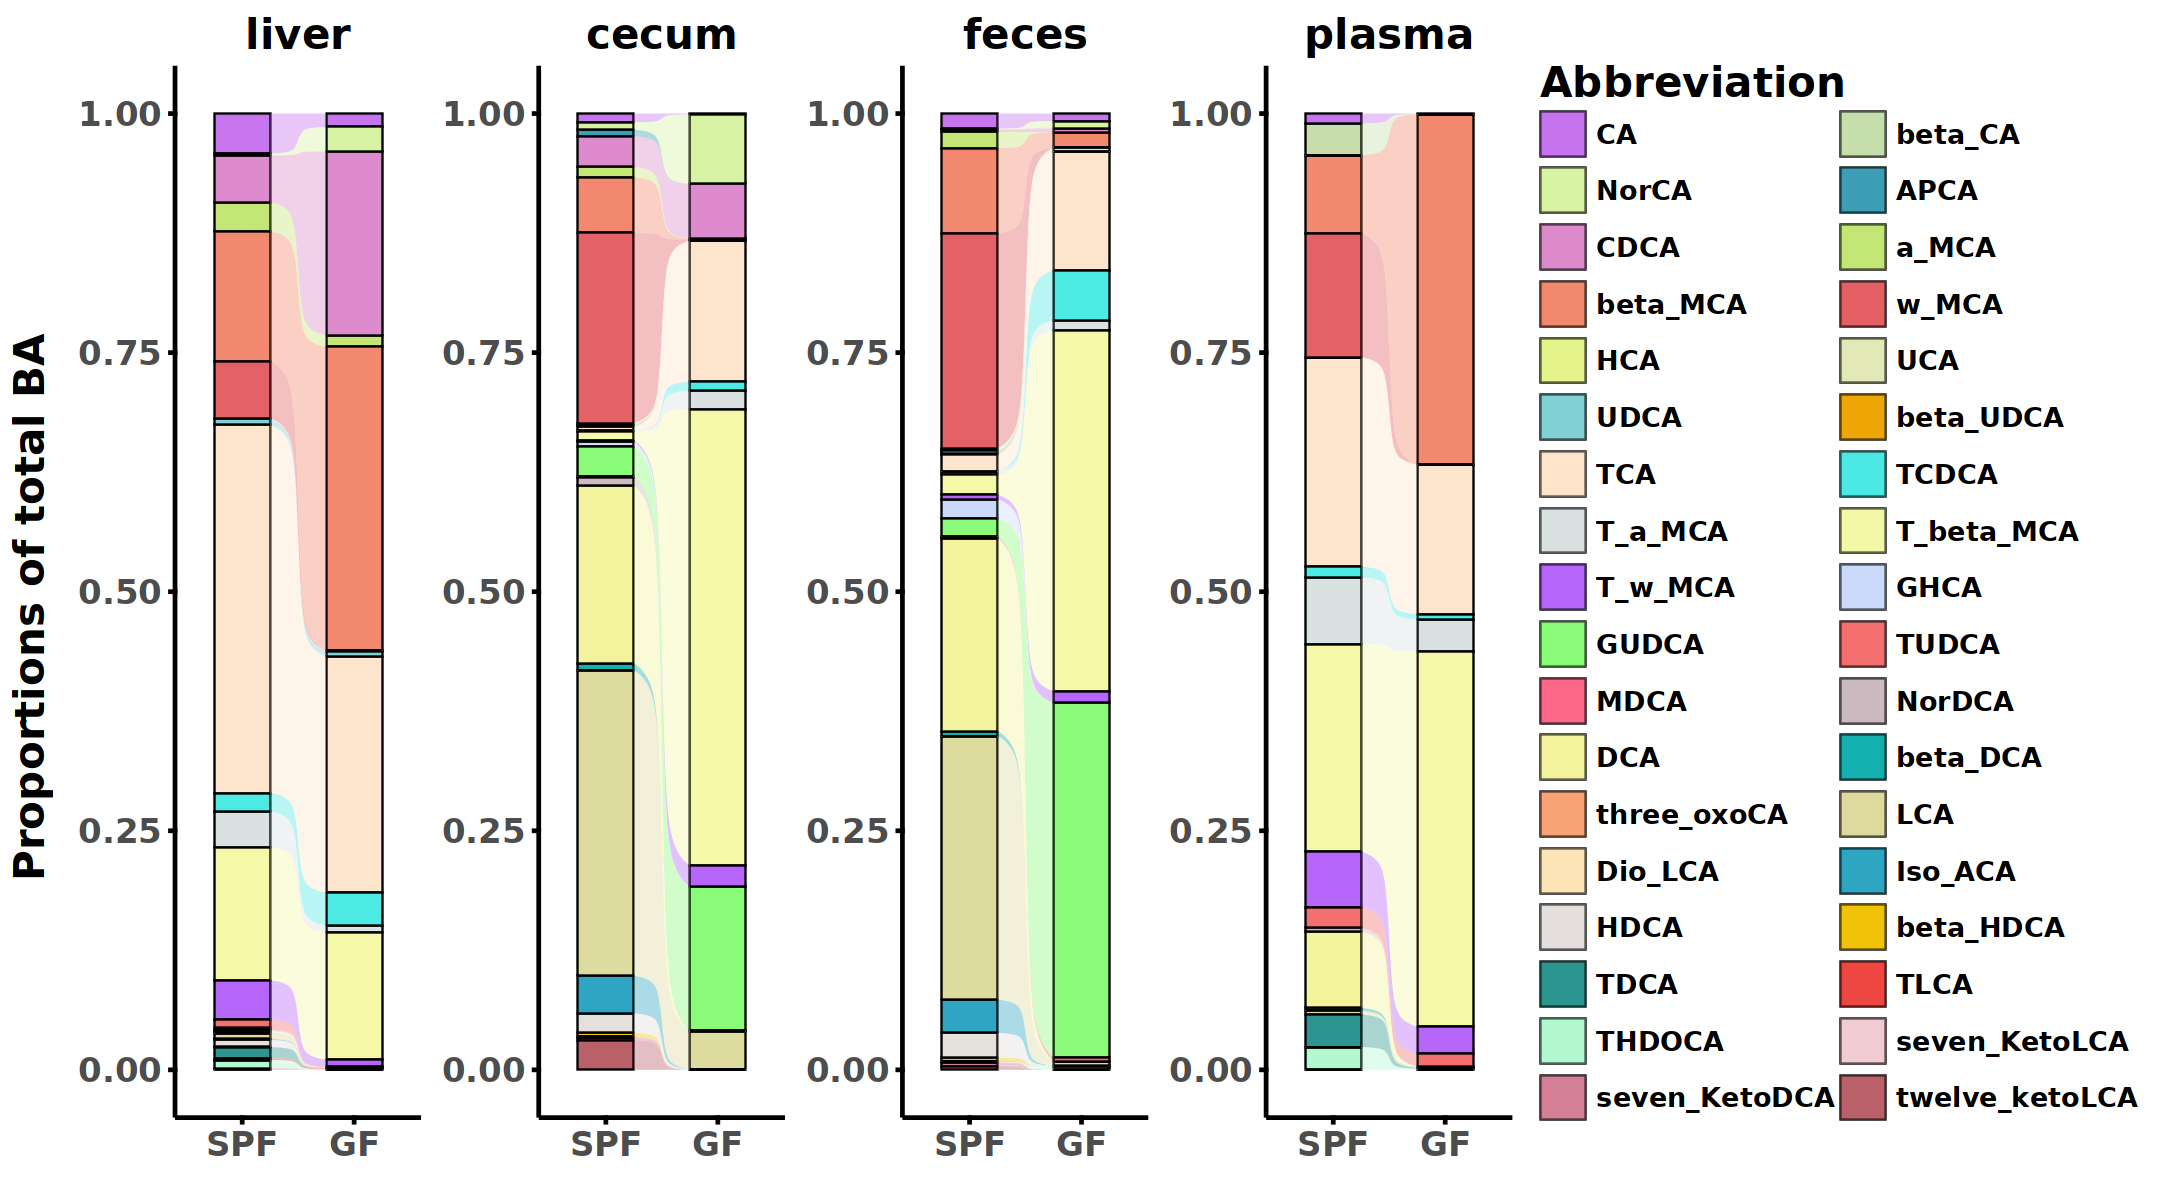

In [54]:
options(repr.plot.width =18,repr.plot.height = 10)
p <- wrap_elements(panel = p)  + labs(tag = "Proportions of total BA ") +
            theme(plot.tag = element_text(size = 25,angle = 90,margin = margin(0,0,0,0),face = "bold"),
                                                            plot.tag.position = "left")
p